In [1]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = read_csv('rice production of India.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [11]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

36/36 - 2s - loss: 0.0263
36/36 - 0s - loss: 0.0080
36/36 - 0s - loss: 0.0069
36/36 - 0s - loss: 0.0062
36/36 - 0s - loss: 0.0051
36/36 - 0s - loss: 0.0041
36/36 - 0s - loss: 0.0034
36/36 - 0s - loss: 0.0029
36/36 - 0s - loss: 0.0027
36/36 - 0s - loss: 0.0025
36/36 - 0s - loss: 0.0024
36/36 - 0s - loss: 0.0024
36/36 - 0s - loss: 0.0024
36/36 - 0s - loss: 0.0024
36/36 - 0s - loss: 0.0024
36/36 - 0s - loss: 0.0024
36/36 - 0s - loss: 0.0024
36/36 - 0s - loss: 0.0024
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s - loss: 0.0023
36/36 - 0s -

In [13]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [14]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4265.65 RMSE
Test Score: 12632.55 RMSE


In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [18]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

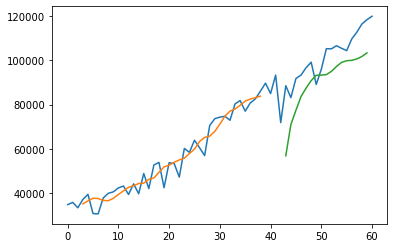

In [19]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()